In [113]:
in_path =r'../../data/raw/' # use your path

import pandas as pd
pd.set_option('display.max_columns', 500)
import glob
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
%matplotlib inline

def concat(in_path):
    allFiles = glob.glob(in_path + "/*.txt")
    frame = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        df_ = pd.read_table(file_,index_col=False, header=0)
        list_.append(df_)
    df = pd.concat(list_)
    df=df[~df.AB.isnull()]
    df=df[(df.DT!='Correction') & (df.DT!='Editorial Material')]
    df.reset_index(inplace=True, drop=True)
    df.to_csv(out_path+"articles.csv")
    print len(df)
    return df  

def extract_docs(df):
    docs_csv=out_path+"docs.csv"
    df.AB.to_csv(docs_csv, index=False)
    print len(df)
    with open(docs_csv) as f:
        docs = f.readlines()    
    return docs

def pre(docs):
    docs_prepared=out_path+'docs_prepared.csv'
    stop= open ('stopList.txt').read()
    stop_list = set(stop.replace("\n", " ").split())
    docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]
    docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]
    with open(docs_prepared, 'w') as f:
        for doc in docs_stemed:f.write("%s\n" % ' '.join(doc))
    return docs_stemed

def sims():
    index = similarities.MatrixSimilarity(corpus_lsi) 
    lines = docs
    sims = open('lsi.csv', 'w')
    #countdegree= open('09 LSI - degreecount.csv', 'w')
    sims.write('source,target,weight,type\n')
    for i in range(len(docs)):
        doc=lines[i]    
        vec_bow = dictionary.doc2bow(doc)
        vec_tran = lsi[tfidf[vec_bow]]
        #vec_tran = lda[tfidf[vec_bow]]
        simsinx = index[vec_tran]
        #count=0;
        #for j in range(0,len(simsinx)):
            #if simsinx[j]>.5: 
                #count=count+1
        #countdegree.write(str(i+1)+','+str(count-1));countdegree.write('\n')
        for j in range(i+1,len(simsinx)):
            if simsinx[j]>0:                                        
                sims.write(str(i)+','+str(j)+','+str(simsinx[j])+',undirected\n')
    sims.close()

In [21]:
out_path= "../../data/clean/"
df=concat(in_path)

1207


In [22]:
docs=extract_docs(df)

1207


In [23]:
docs=pre(docs)

In [5]:
## documents_clean = [[word for word in document.split() ] for document in docs]
dictionary = corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=5)
dictionary.compactify() 
print dictionary

class MyCorpus(object):
    def __iter__(self):
        for doc in docs:
            yield dictionary.doc2bow(doc)
corpus= MyCorpus() 
corpora.MmCorpus.serialize('deerwester.mm', corpus)
corpus = corpora.MmCorpus('deerwester.mm')
print corpus

Dictionary(2014 unique tokens: [u'', u'assimil', u'payoff', u'accur', u'deviat']...)
MmCorpus(1207 documents, 2014 features, 71503 non-zero entries)


In [6]:
tfidf = models.tfidfmodel.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=100) 
corpus_lsi=lsi[corpus_tfidf]


In [114]:
sims()

In [115]:
df=pd.read_csv('lsi.csv')
df[df.weight>.95]

,source,target,weight,type
228260,227,229,0.978077,undirected
289636,298,485,0.962029,undirected
290305,298,1194,0.967389,undirected
328652,346,974,0.959090,undirected
338515,359,485,0.958332,undirected
338785,359,766,0.969603,undirected
338989,359,974,0.979315,undirected
346011,368,854,0.957054,undirected
393699,432,658,0.958429,undirected
430599,485,1194,0.958880,undirected


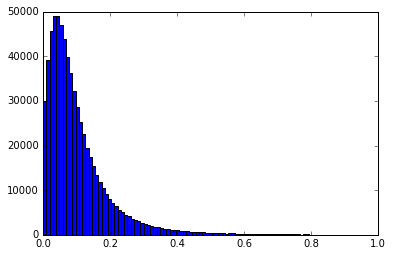

In [130]:
import numpy as np
l=df.weight
binwidth=.01
hist=plt.hist(l,101)

In [131]:
pdf=hist[0]/len(l)

In [132]:
cdf=np.cumsum(hist[0]/len(l))

In [133]:
df['p']=df.weight*100
df['p']=df.p.round()
df['p']=1-cdf[df.p]
df

,source,target,weight,type,p
0,0,1,0.758416,undirected,0.001508
1,0,2,0.162681,undirected,0.173010
2,0,3,0.027323,undirected,0.755784
3,0,4,0.007128,undirected,0.897110
4,0,5,0.060728,undirected,0.547018
5,0,6,0.017190,undirected,0.829096
6,0,7,0.096790,undirected,0.342634
7,0,8,0.025977,undirected,0.755784
8,0,9,0.027783,undirected,0.755784
9,0,10,0.210425,undirected,0.103206


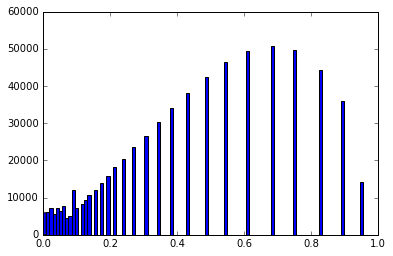

In [136]:
l=df.p
binwidth=.01
hist=plt.hist(l,101 )